In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-cers-dataset/USA_cars_datasets.csv


# Contexto:

Los datos de US Cars se extrajeron de AUCTION EXPORT.com. Este conjunto de datos incluyen información sobre 28 marcas de vehículos limpios y usados a la venta en EE. UU. Se ensamblaron doce características para cada automóvil en el conjunto de datos.

Price	Integer	 Precio de venta en la ad

Years	Integer	Año de registro del vehiculo

Brand	String	Marca del carro

Model	String	modelo del carro

Color	String	Color

State/City	String	Localizacion donde esta el carro

Mileage	Float	millas del carro

Vin	String	La placa del carro

Title Status	String	Carros accidentados y no accidentados 

Lot	Integer	Un número de lote es un número de identificación asignado a una cantidad particular o lote de material de un solo fabricante. Para automóviles, un número de lote se combina con un número de serie para formar el Número de identificación del vehículo.

Condition	String	Tiempo


# Label Encoding y/o Hot encoding
Podriamos usar Label Encoding y/o Hot encoding para el color del carro

# Preguntas Smart:

¿Cual es la marca de automovil mas representativa en USA?

¿Cual es el estado con mas carros en venta?

¿Cual es el porcentaje de vehiculos accidentados restaurados en venta?

# Tipos de datos

In [3]:
df = pd.read_csv("/kaggle/input/usa-cers-dataset/USA_cars_datasets.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


# Descripción

In [5]:
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [21]:
df.describe(include = "all")

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country
count,2499.000000,2499.000000,2499,2499,2499.000000,2499,2.499000e+03,2499,2499,2.499000e+03,2499,2499
unique,NaN,NaN,28,127,NaN,2,NaN,49,2495,NaN,44,2
top,NaN,NaN,ford,door,NaN,clean vehicle,NaN,white,1gnevhkw8jj148388,NaN,pennsylvania,usa
freq,NaN,NaN,1235,651,NaN,2336,NaN,707,2,NaN,299,2492
mean,1249.000000,18767.671469,NaN,NaN,2016.714286,NaN,5.229869e+04,NaN,NaN,1.676914e+08,NaN,NaN
std,721.543484,12116.094936,NaN,NaN,3.442656,NaN,5.970552e+04,NaN,NaN,2.038772e+05,NaN,NaN
min,0.000000,0.000000,NaN,NaN,1973.000000,NaN,0.000000e+00,NaN,NaN,1.593488e+08,NaN,NaN
25%,624.500000,10200.000000,NaN,NaN,2016.000000,NaN,2.146650e+04,NaN,NaN,1.676253e+08,NaN,NaN
50%,1249.000000,16900.000000,NaN,NaN,2018.000000,NaN,3.536500e+04,NaN,NaN,1.677451e+08,NaN,NaN
75%,1873.500000,25555.500000,NaN,NaN,2019.000000,NaN,6.347250e+04,NaN,NaN,1.677798e+08,NaN,NaN


In [13]:
df["condition"].unique()

array(['10 days left', '6 days left', '2 days left', '22 hours left',
       '20 hours left', '19 hours left', '3 days left', '21 hours left',
       '17 hours left', '2 hours left', '3 hours left', '34 minutes',
       '16 hours left', '18 hours left', '1 days left', '32 minutes',
       '14 hours left', '5 hours left', '4 days left', '9 days left',
       '23 hours left', '8 days left', '7 days left', '5 days left',
       '9 minutes', '1 minutes', '7 hours left', '16 minutes',
       '6 hours left', '1 hours left', 'Listing Expired', '13 days left',
       '24 hours left', '15 hours left', '53 minutes', '27 minutes',
       '12 days left', '15 days left', '30 minutes', '29 minutes',
       '28 minutes', '48 minutes', '11 days left', '4 hours left',
       '47 minutes', '12 hours left', '36 minutes'], dtype=object)

In [15]:
df.shape

(2499, 13)

In [16]:
df.head(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,6,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


In [17]:
df.tail(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
2489,2489,13900,nissan,rogue,2018,clean vehicle,40259.0,gray,knmat2mt9jp582734,167762219,florida,usa,21 hours left
2490,2490,10400,nissan,sentra,2019,clean vehicle,25264.0,blue,3n1ab7ap4ky323241,167722702,california,usa,1 days left
2491,2491,9200,nissan,versa,2018,clean vehicle,35677.0,black,3n1cn7ap7jl882312,167762221,florida,usa,21 hours left
2492,2492,7400,nissan,versa,2019,clean vehicle,35511.0,black,3n1cn7ap5kl841811,167722706,california,usa,1 days left
2493,2493,9200,nissan,versa,2018,clean vehicle,33027.0,black,3n1cn7ap0jl883768,167762224,florida,usa,21 hours left
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left
2498,2498,9200,nissan,versa,2018,clean vehicle,31371.0,silver,3n1cn7ap4jl884311,167762228,florida,usa,21 hours left


In [8]:
tabla1=pd.crosstab(index=df["brand"], columns="count").reset_index()
tabla1['Freq. Rel']=tabla1['count']/sum(tabla1['count'])
tabla1

col_0,brand,count,Freq. Rel
0,acura,3,0.001200
1,audi,4,0.001601
2,bmw,17,0.006803
3,buick,13,0.005202
4,cadillac,10,0.004002
5,chevrolet,297,0.118848
6,chrysler,18,0.007203
7,dodge,432,0.172869
8,ford,1235,0.494198
9,gmc,42,0.016807


In [25]:
tabla1=pd.crosstab(index=df["state"], columns="count").reset_index()
tabla1['Freq. Rel']=tabla1['count']/sum(tabla1['count'])
tabla1

col_0,state,count,Freq. Rel
0,alabama,17,0.006803
1,arizona,33,0.013205
2,arkansas,12,0.004802
3,california,190,0.076030
4,colorado,21,0.008403
5,connecticut,25,0.010004
6,florida,246,0.098439
7,georgia,51,0.020408
8,idaho,2,0.000800
9,illinois,113,0.045218


In [26]:
tabla1=pd.crosstab(index=df["title_status"], columns="count").reset_index()
tabla1['Freq. Rel']=tabla1['count']/sum(tabla1['count'])
tabla1

col_0,title_status,count,Freq. Rel
0,clean vehicle,2336,0.934774
1,salvage insurance,163,0.065226


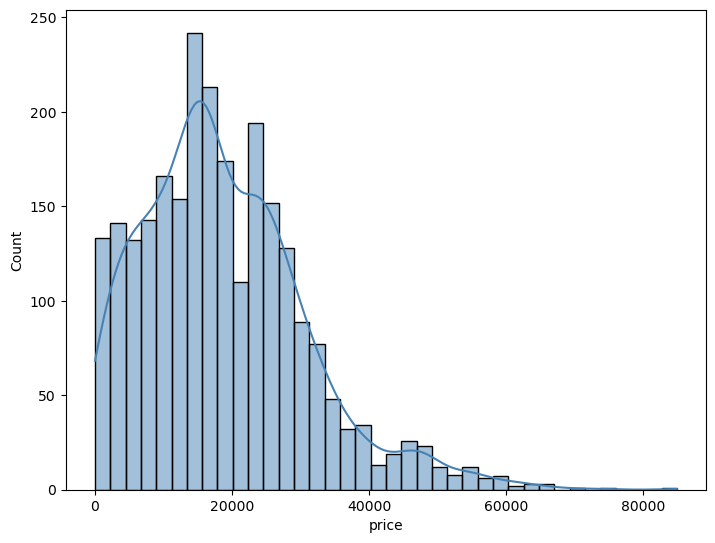

In [22]:
fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=df['price'],kde=True,color="steelblue")
plt.show() 